<a href="https://colab.research.google.com/github/Ramyasree0707/Customer-Purchase-Behavior-Analysis/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
#mounting your drive, so that you can access the files there
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
superstore_df = pd.read_csv('drive/My Drive/Superstore Marketing Data - Sheet1.csv')
superstore_df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Dataset Rows & Columns count
superstore_df.shape

(2205, 22)

In [ ]:
# Dataset information
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Duplicate values
len(superstore_df[superstore_df.duplicated()])

0

In [ ]:
superstore_df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

**Insights:**

The dataset has 2240 rows and 22 columns and does not contain duplicate values.There are 24 missing values in income column, and the datatype of Dt_Customer has to be converted to datetime.

In [ ]:
# Dataset columns
superstore_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# Data describe
superstore_df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


**Clean and preprocess the dataset (handling missing values, data types, etc.).**

In [ ]:
superstore_df[superstore_df['Dt_Customer']=='########']

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
8,4047,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0
11,5642,1979,Master,Together,62499.0,1,0,########,0,140,...,0,13,4,2,3,1,6,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,8595,1973,Graduation,Widow,42429.0,0,1,########,99,55,...,2,0,4,2,1,1,3,5,0,0
2232,7232,1973,Graduation,Widow,42429.0,0,1,########,99,55,...,2,0,4,2,1,1,3,5,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0


In [ ]:
#converting the datatype of DT_Customer to datetime
#superstore_df['Dt_Customer'] = pd.to_datetime(superstore_df['Dt_Customer'])

In [ ]:
# Dropping Dt_Customer, as there are 916 missing values.
superstore_df.drop(['Dt_Customer'],axis = 1, inplace=True)

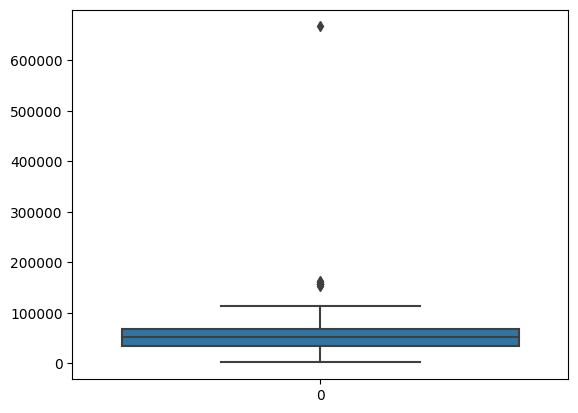

In [ ]:
sns.boxplot(superstore_df['Income'])
plt.show()

In [ ]:
superstore_df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain'],
      dtype='object')

In [ ]:
# filling the missing values in income column with median
superstore_df['Income'] = superstore_df['Income'].fillna(superstore_df['Income'].median())

In [ ]:
superstore_df['Total_Mnt']= superstore_df.MntWines+superstore_df.MntFruits+superstore_df.MntMeatProducts+superstore_df.MntFishProducts+superstore_df.MntSweetProducts+superstore_df.MntGoldProds


In [ ]:
superstore_df.shape

(2240, 22)

**Manipulations to the data:**

There are 916 missing values in Dt_Customer column,so I have dropped the column.I have imputed the missing values in Income column with median, as there are few outliers and median is not sensitive to outliers.I have created a new column Total_Mnt,which is the Total money spent by customers.


**Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

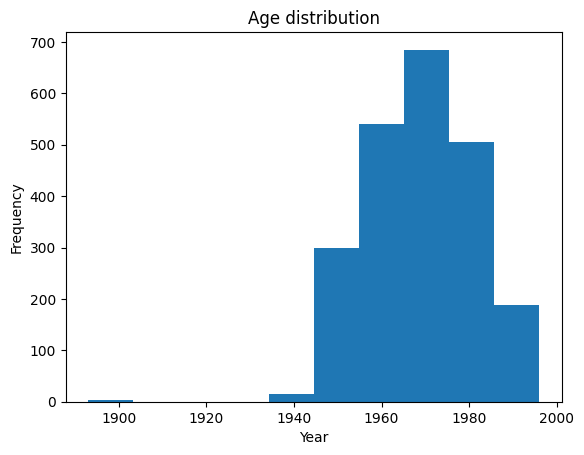

In [ ]:
#plotting the year of birth distribution using histogram
plt.hist(superstore_df['Year_Birth'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()


There is a gap between bins in the histogram, this indicates an outlier.

In [ ]:
superstore_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

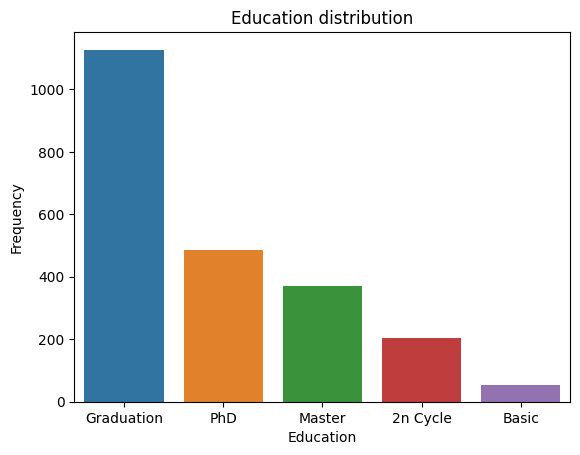

In [ ]:
#plotting the distribution of Education
Education_level = superstore_df['Education'].value_counts()
sns.barplot(x=Education_level.index, y=Education_level.values)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education distribution')
plt.show()

This chart shows that, there are more number of customers in graduation level.

In [ ]:
superstore_df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

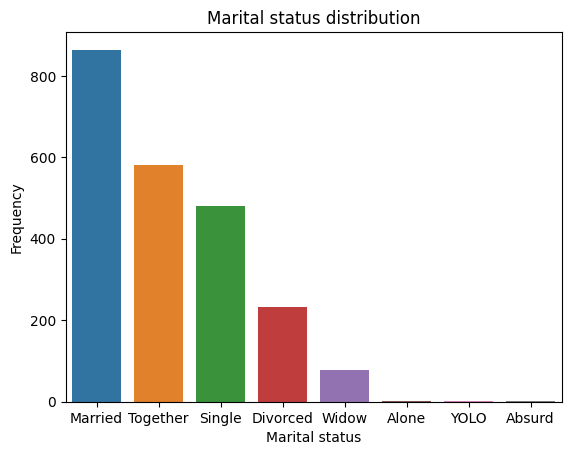

In [ ]:
#plotting the distribution of marital status
Marital_status_count = superstore_df['Marital_Status'].value_counts()
sns.barplot(x=Marital_status_count.index, y=Marital_status_count.values)
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.title('Marital status distribution')
plt.show()

This chart shows that, most of the customeres are married.

In [ ]:
# calculating mean,median,variance and standard deviation for numerical variables.
numerical_variables = ['Income', 'Recency','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
summary = superstore_df[numerical_variables].agg(['mean', 'median', 'var','std'])
statistics = pd.DataFrame(summary)
statistics.rename(columns = {'mean':'Mean','median':'Median','var':'Variance','std':'Standard deviation'}).T

,mean,median,var,std
Income,52237.975446,51381.5,6.268992e+08,25037.955891
Recency,49.109375,49.0,8.388237e+02,28.962453
MntWines,303.935714,173.5,1.132978e+05,336.597393
MntFruits,26.302232,8.0,1.581926e+03,39.773434
MntMeatProducts,166.950000,67.0,5.094743e+04,225.715373
MntFishProducts,37.525446,12.0,2.984325e+03,54.628979
MntSweetProducts,27.062946,8.0,1.704080e+03,41.280498
MntGoldProds,44.021875,24.0,2.721442e+03,52.167439
NumDealsPurchases,2.325000,2.0,3.733542e+00,1.932238
NumWebPurchases,4.084821,4.0,7.721252e+00,2.778714


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
#Measures of central tendency for Income
mean_income = superstore_df['Income'].mean()
median_income = superstore_df['Income'].median()
mode_income = superstore_df['Income'].mode()[0]
variance_income = superstore_df['Income'].var()
standard_deviation_income = superstore_df['Income'].std()
print("Mean Income:",mean_income)
print("Median of Income:",median_income)
print("Mode of Income:",mode_income)
print("Variance of Income:",variance_income)
print("Standard deviation of Income:",standard_deviation_income)

Mean Income: 52237.97544642857
Median of Income: 51381.5
Mode of Income: 51381.5
Variance of Income: 626899235.1807278
Standard deviation of Income: 25037.9558906219


In [ ]:
# Detecting Outliers in Income using IQR
q1 = superstore_df['Income'].quantile(0.25)
q3 = superstore_df['Income'].quantile(0.75)
IQR = q3 - q1
lower = q1-1.5*IQR
upper = q3+1.5*IQR
outliers = superstore_df[(superstore_df['Income']<lower) | (superstore_df['Income']>upper)]
outliers

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
325,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,2,1,1,0,0,28,0,1,0,0
497,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,17,3,4,15,0,28,1,0,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,8,1,12,4,3,1,3,6,0,0
731,1503,1976,PhD,Together,162397.0,1,1,31,85,1,...,2,1,2,0,0,0,1,1,0,0
853,5336,1971,Master,Together,157733.0,1,0,37,39,1,...,2,0,8,0,1,0,1,1,0,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,81,1,1,...,1,1,1,0,0,0,0,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,85,2,1,...,1,1,1,0,0,0,0,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,1,2,1,15,0,22,0,0,0,0


In [ ]:
# Removing outliers in Income
superstore_df = superstore_df[(superstore_df['Income']>=lower) & (superstore_df['Income']<=upper)]

In [ ]:
# Measures of central tendency for year_birth
mean = superstore_df['Year_Birth'].mean()
median = superstore_df['Year_Birth'].median()
mode = superstore_df['Year_Birth'].mode()[0]
var = superstore_df['Year_Birth'].var()
std = superstore_df['Year_Birth'].std()
print("Mean year birth:",mean)
print("Median of birth year:",median)
print("Mode of birth year:",mode)
print("Variance of birth year:",var)
print("Standard deviation of birth year:",std)

Mean year birth: 1968.7925627240143
Median of birth year: 1970.0
Mode of birth year: 1976
Variance of birth year: 143.76824587235257
Standard deviation of birth year: 11.990339689614826


In [ ]:
# Detecting ouliers in year_birth using z scores
from scipy import stats
z_scores = np.abs(stats.zscore(superstore_df['Year_Birth']))
threshold = 3
superstore_df[z_scores>threshold]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,23,8,0,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,36,755,144,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,99,15,6,...,7,4,25,1,2,1,2,5,0,1


In [ ]:
# Removing outliers i year birth column
superstore_df = superstore_df[(z_scores<=threshold)]

In [ ]:
superstore_df.shape

(2205, 22)

In [ ]:
#Measures of central tendency for MntWines
mean_Wine = superstore_df['MntWines'].mean()
median_Wine = superstore_df['MntWines'].median()
mode_Wine = superstore_df['MntWines'].mode()[0]
variance_Wine = superstore_df['MntWines'].var()
standard_deviation_Wine = superstore_df['MntWines'].std()
print("Mean Wine:",mean_Wine)
print("Median of wine:",median_Wine)
print("Mode of Wine:",mode_Wine)
print("Variance of wine:",variance_Wine)
print("Standard deviation of wine:",standard_deviation_Wine)

Mean Wine: 306.16462585034014
Median of wine: 178.0
Mode of Wine: 2
Variance of wine: 113902.09130708544
Standard deviation of wine: 337.4938389172244


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables:**

*  Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.






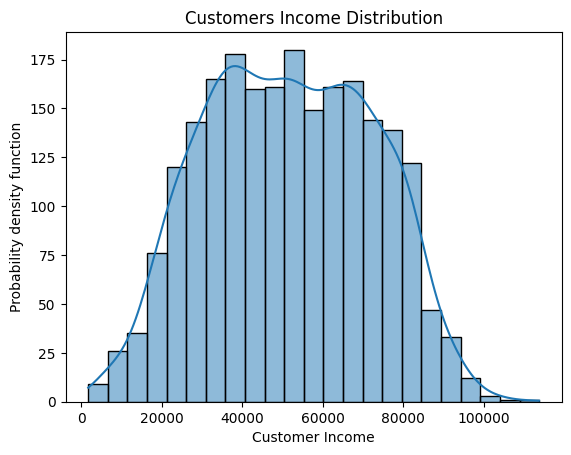

In [ ]:
# checking whether income follws normal distribution
sns.histplot(superstore_df['Income'],kde=True)
plt.xlabel("Customer Income")
plt.ylabel("Probability density function")
plt.title("Customers Income Distribution")
plt.show()


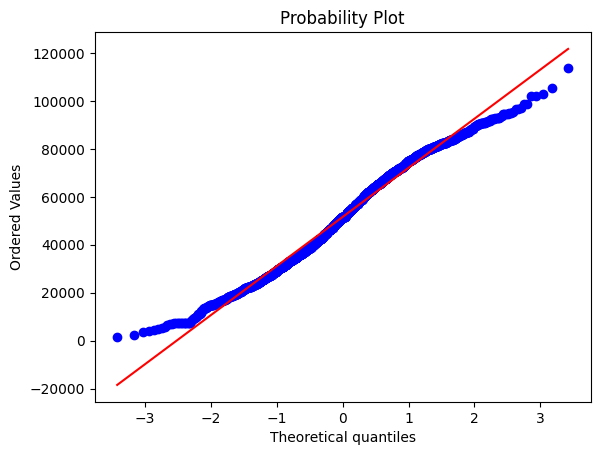

In [ ]:
#Normality test
stats.probplot(superstore_df['Income'], dist = 'norm' , plot=plt)
plt.show()

The blue dots represent our data and the diagonal line represents the normal distribution. If the data points follow the diagonal line, the data will be normally distributed.The data points do not follow the diagonal line, so they do not follow the normal distribution.

In [ ]:
pip install fitter

In [ ]:
from fitter import Fitter

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,6.590487e-10,2457.672917,2480.510150,inf,0.033056,1.498437e-02
lognorm,9.522483e-10,2430.420900,2447.548825,inf,0.045783,1.690812e-04
gamma,9.526903e-10,2430.974667,2448.102592,inf,0.046242,1.399711e-04
uniform,4.232824e-09,2329.257973,2340.676589,inf,0.220108,2.575754e-95
expon,6.728793e-09,2392.017320,2403.435937,inf,0.267881,9.928857e-142


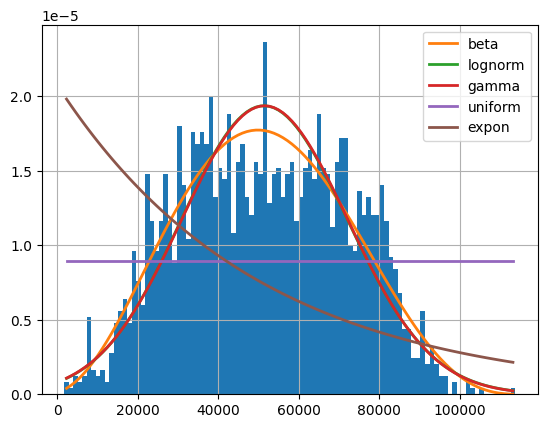

In [ ]:
income = superstore_df['Income'].values
f = Fitter(income,distributions = ['normal','expon','lognorm','beta','gamma','uniform'])
f.fit()
f.summary()

In [ ]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
params = {}
# defining a function to find distributio of data
def get_best_distribution(data):
  dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto','expon']
  dist_results = []


  for dist_name in dist_names:
      dist = getattr(scipy.stats, dist_name)
      param = dist.fit(data)
      params[dist_name] = param  # here's the parameters of your distribution, scale, location
      # ks test is used to find the best fit
      D, p = st.kstest(data, dist_name, args=param)
      print("p value for "+dist_name+" = "+str(p))
      dist_results.append((dist_name, p))
       # store the name of the best fit and its p value
  best_dist, best_p = (max(dist_results, key=lambda item: item[1]))


  print("Best fitting distribution: "+str(best_dist))
  print("Best p value: "+ str(best_p))
  print("Parameters for the best fit: "+ str(params[best_dist]))




In [ ]:
  # Finding distribution of income variable
  data = superstore_df['Income']
  get_best_distribution(data)

p value for gamma = 0.0001399711477024255
p value for beta = 0.014984370593374803
p value for rayleigh = 3.192829212173661e-12
p value for norm = 0.00011438374726263822
p value for pareto = 9.928261519456165e-142
p value for expon = 9.928857012553934e-142
Best fitting distribution: beta
Best p value: 0.014984370593374803
Parameters for the best fit: (3.421996414622779, 3.9913017798115185, -3388.6131304186315, 118986.6651713328)


**Therefore, Income variable follows Beta distribution with p value: 0.01498**

In [ ]:
#for beta distribution the fit method returns four parameters: a,b,loc,scale
#Parameters for the best fit: (3.421996414622779, 3.9913017798115185, -3388.6131304186315, 118986.6651713328)

In [ ]:
# Calculating corresponding probabilities and expected values of Income variable using betadistribution
alpha = params['beta'][0]
beta = params['beta'][1]
loc = params['beta'][2]
scale = params['beta'][3]
print(alpha,beta,loc,scale)
# Calculate the expected value (mean) for Income
expected_value = loc +(alpha / (alpha + beta))*scale

print(f"Expected Value (Mean) of Income: {expected_value:.2f}")



3.421996414622779 3.9913017798115185 -3388.6131304186315 118986.6651713328
Expected Value (Mean) of Income: 51535.92


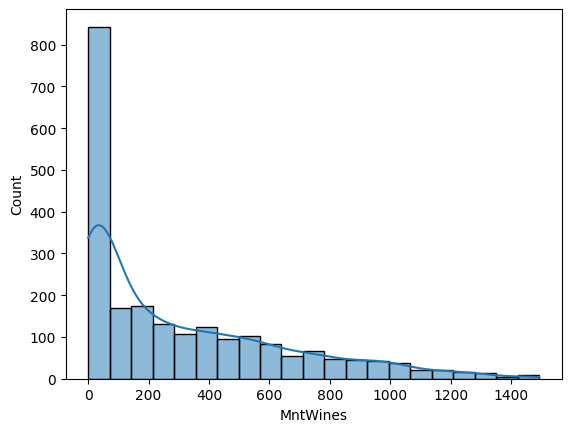

In [ ]:
# Plotting the distribution of MntWines
sns.histplot(superstore_df['MntWines'],kde=True)
plt.show()

In [ ]:
# finding the distribution that fits MntWines data
data1 = superstore_df['MntWines']
get_best_distribution(data1)

p value for gamma = 8.515727944291687e-13
p value for beta = 9.205593414266924e-14
p value for rayleigh = 2.5754341622537908e-74
p value for norm = 1.911441912926661e-65
p value for pareto = 2.071677862306909e-43
p value for expon = 5.383878315230701e-78
Best fitting distribution: gamma
Best p value: 8.515727944291687e-13
Parameters for the best fit: (0.540515780673448, -3.08443919564448e-23, 542.9580120263408)


**Amount spent on wines MntWines follows Gamma distribution.**

In [ ]:
# for gamma distributio fit method returns three parameters(shape,loc,scale) shape means alpha, scale means beta

In [ ]:
# calculating expected value for MntWines
shape = params['gamma'][0]
scale = params['gamma'][2]
print(shape,scale)
expected_value = shape*scale
print("Expected value of MntWines:",expected_value)


0.540515780673448 542.9580120263408
Expected value of MntWines: 293.477373743321


In [ ]:
# Finding the distribution of year_birth variable
data2 = superstore_df['Year_Birth']
get_best_distribution(data2)

p value for gamma = 1.0622763230091127e-07
p value for beta = 1.5986062582749596e-05
p value for rayleigh = 5.858051535561693e-33
p value for norm = 1.4182000805539654e-06
p value for pareto = 8.766295315048942e-137
p value for expon = 8.766739476387774e-137
Best fitting distribution: beta
Best p value: 1.5986062582749596e-05
Parameters for the best fit: (2.604207410108693, 2.4725538979655286, 1939.3964737702552, 57.474340173254376)


Year_birth variable(age) follows Beta distribution.

In [ ]:
#calculating expected value
alpha = params['beta'][0]
beta = params['beta'][1]
loc = params['beta'][2]
scale = params['beta'][3]
print(alpha,beta,loc,scale)

# Calculate the expected value (mean) for Income
expected_value = loc +(alpha / (alpha + beta))*scale

print(f"Expected Value (Mean) of Year_Birth: {expected_value:.2f}")


2.604207410108693 2.4725538979655286 1939.3964737702552 57.474340173254376
Expected Value (Mean) of Year_Birth: 1968.88


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

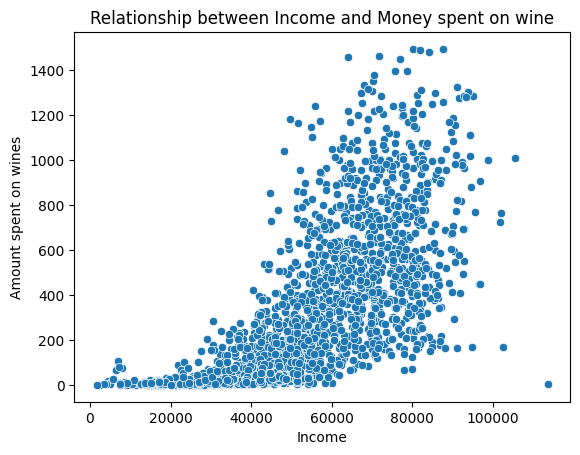

In [ ]:
sns.scatterplot(data=superstore_df,x='Income',y='MntWines')
plt.xlabel('Income')
plt.ylabel('Amount spent on wines')
plt.title('Relationship between Income and Money spent on wine')
plt.show()

This Scatterplot shows that, as the income increases Amount spent on wines increases.

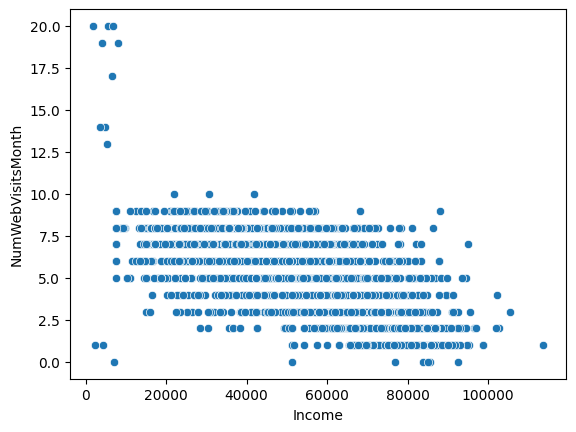

In [ ]:
sns.scatterplot(data=superstore_df,x='Income',y='NumWebVisitsMonth')
plt.show()

This chart shows that, as the income increases number of visits to companys website decreases.This means customers with Average income has more number of visits.

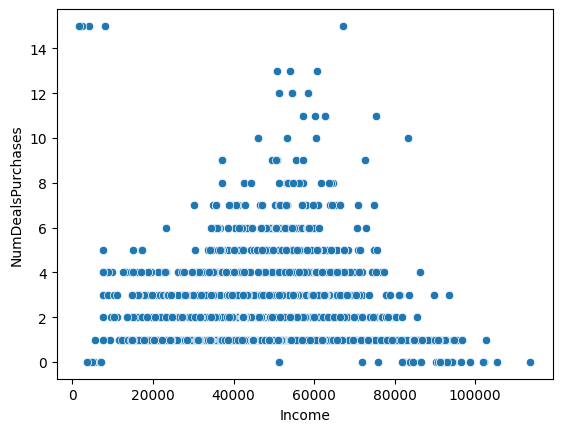

In [ ]:
sns.scatterplot(data=superstore_df,x='Income',y='NumDealsPurchases')
plt.show()

This chart shows that,as the customers with average income has more number of purchases made with discount.

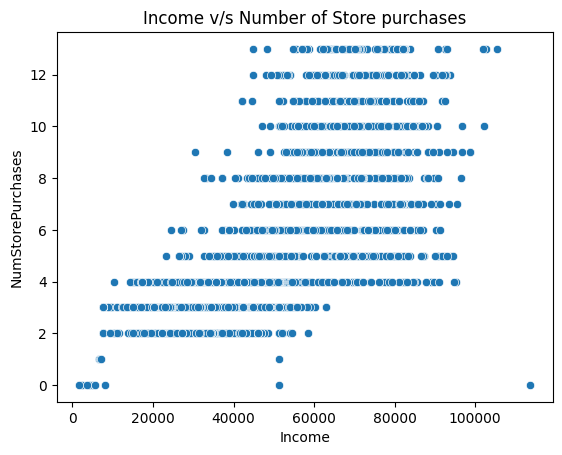

In [ ]:
sns.scatterplot(data=superstore_df,x='Income',y='NumStorePurchases')
plt.title('Income v/s Number of Store purchases')
plt.show()

This chart shows that, as the income increases, number of store purchases also increases. This means High income customers prefer to purchase products directly from the store.

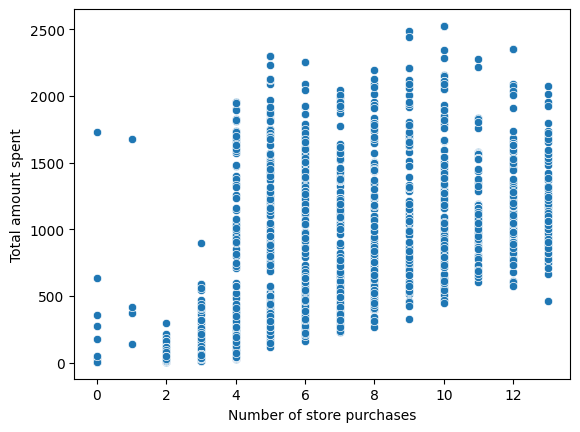

In [ ]:
sns.scatterplot(data=superstore_df,x='NumStorePurchases',y='Total_Mnt')
plt.xlabel('Number of store purchases')
plt.ylabel('Total amount spent')
plt.show()

This chart shows that, as number of store purchases increases, total money spent increases.

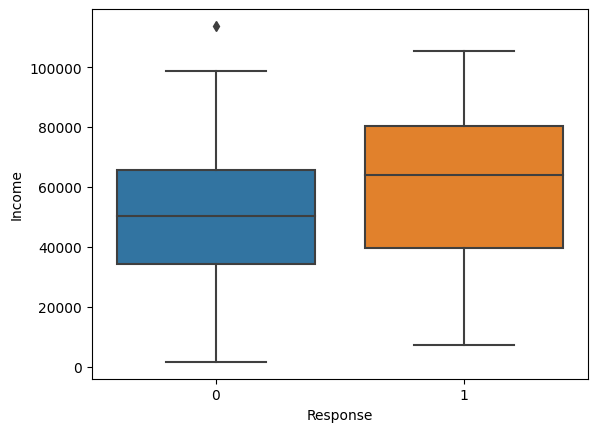

In [ ]:
sns.boxplot(data=superstore_df,x='Response',y='Income')
plt.show()

This box plot shows that, most of the offers are accepted by high income customers and rejected by those customers who have average income.

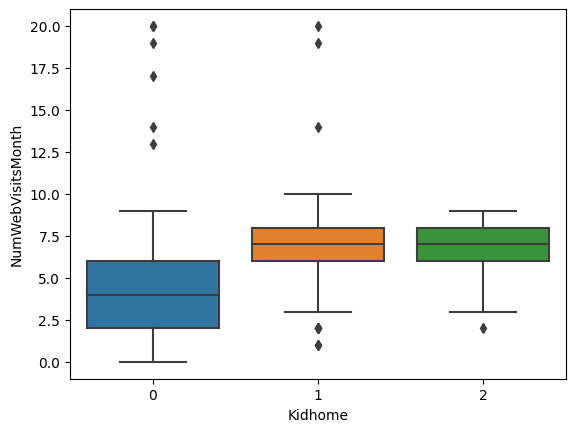

In [ ]:
sns.boxplot(data=superstore_df,x='Kidhome',y='NumWebVisitsMonth')
plt.show()

This chart shows that, as the number of kids in home increases number of web visits month increases.

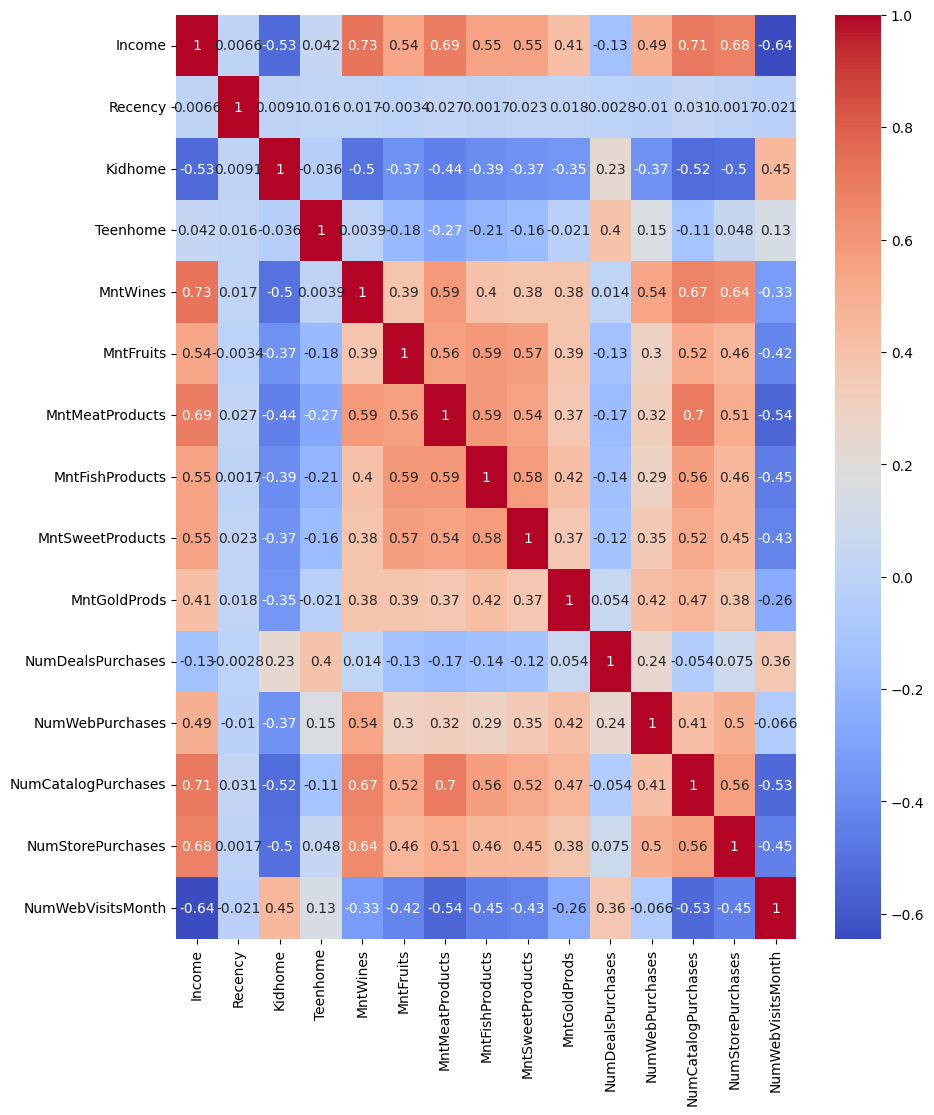

In [ ]:
corr = superstore_df[['Income', 'Recency','Kidhome','Teenhome','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].corr()

plt.figure(figsize=(10,12))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')
plt.show()

From this heatmap, we can say that

* As income increases, money spent on wine,meat products increases and Income
has negative correlation with NumWebVisitsMonth.i.e, As income increaes number of web visits month decreases.

*  As income increases, NumCatalogPurchases(buying goods o be shipped) also increases.


*  There is a positive correlation between Teenhome and NumDealsPurchases, that means Customers with Teenagers in Home, purchase mostly discount products.





## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

In [ ]:
superstore_df['Response'].value_counts()

0    1895
1     334
Name: Response, dtype: int64

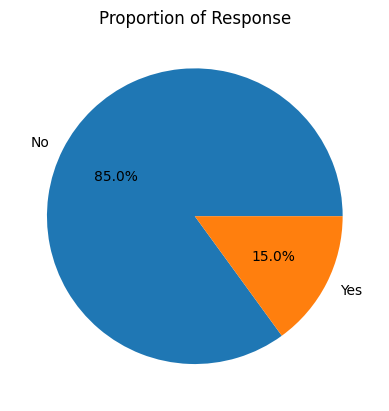

In [ ]:
response_count = superstore_df['Response'].value_counts()
plt.pie(response_count,labels=['No','Yes'],autopct='%1.1f%%')
plt.title("Proportion of Response")
plt.show()

This pie chart shows that,only 15% of customers accepted the offer and 85% of offers are rejected.

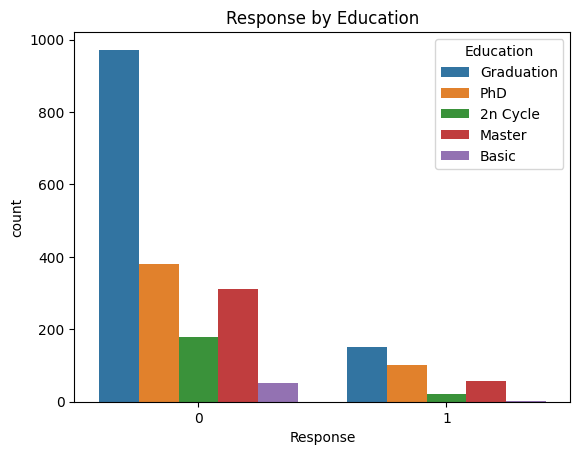

In [ ]:
sns.countplot(data=superstore_df,x='Response',hue='Education')
plt.title("Response by Education")
plt.show()

This chart shows that,there are more number of customers in graduation level, and most of the offers are accepted by Customers in graduation level followed by phd customers.

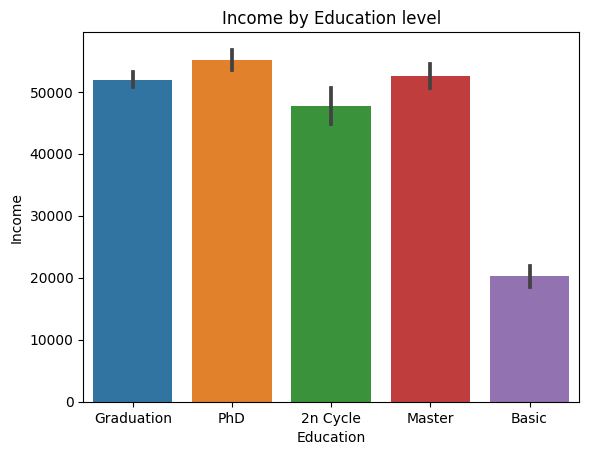

In [ ]:
sns.barplot(data=superstore_df,x='Education',y='Income')
plt.title("Income by Education level")
plt.show()

This chart shows that,Phd customers have high income followed by masters and graduation customers.

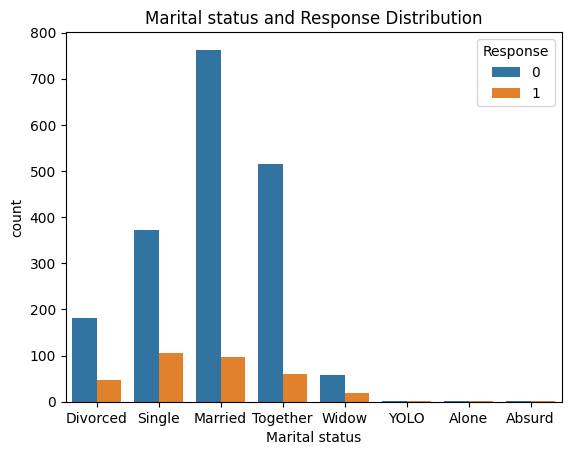

In [ ]:
sns.countplot(data=superstore_df,x='Marital_Status',hue='Response')
plt.xlabel("Marital status")
plt.title('Marital status and Response Distribution')
plt.show()

This chart shows that, there are more number of Married customers.Most of the offers are accepted by Single customers and married customers.

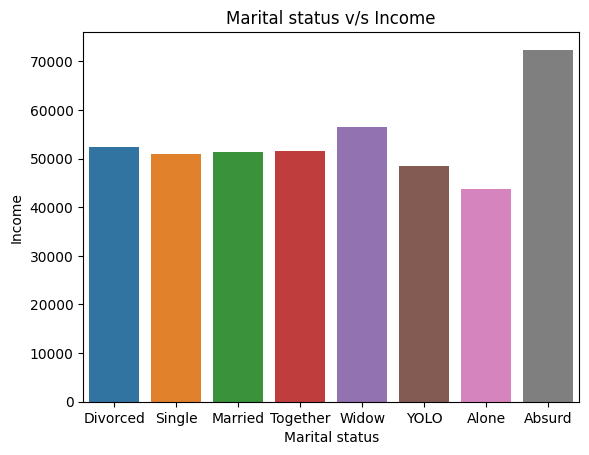

In [ ]:
sns.barplot(data=superstore_df,x='Marital_Status',y='Income',errorbar=None)
plt.xlabel('Marital status')
plt.ylabel('Income')
plt.title('Marital status v/s Income')
plt.show()

This bar chart shows that Widow customers has high income.As there are only two Absurd customers it is not important.

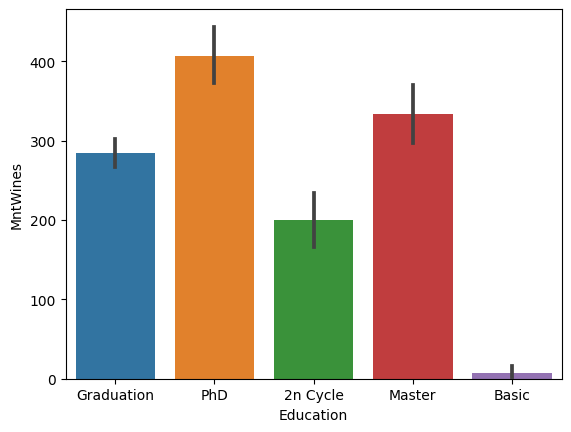

In [ ]:
sns.barplot(data=superstore_df,x='Education',y='MntWines')
plt.show()

This chart shows that,phd customers spend high amount of money on wine products and they have high income.This means wine products are highly purchased by high income customers.

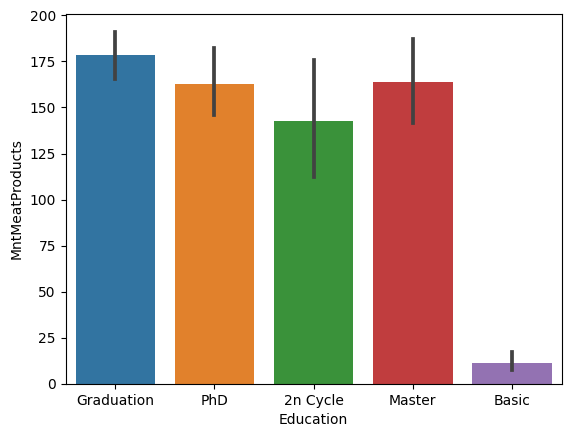

In [ ]:
sns.barplot(data=superstore_df,x='Education',y='MntMeatProducts')
plt.show()

This chart shows that, almost all customers spend more money on meat products.

In [ ]:
superstore_df.Complain.value_counts()

0    2209
1      20
Name: Complain, dtype: int64

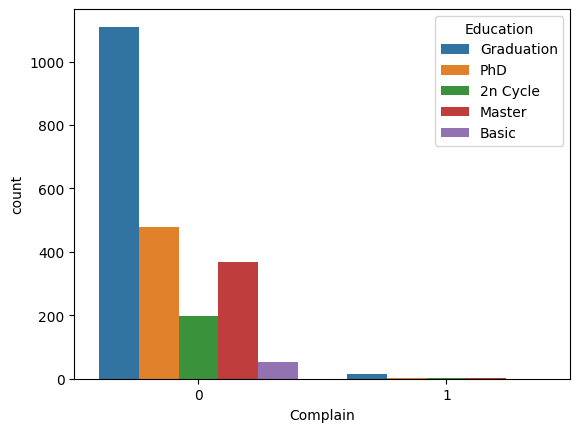

In [ ]:
sns.countplot(data=superstore_df,x='Complain',hue='Education')
plt.show()

From this chart we can say that there are very less number of complians, and those complains are from Graduated customers.

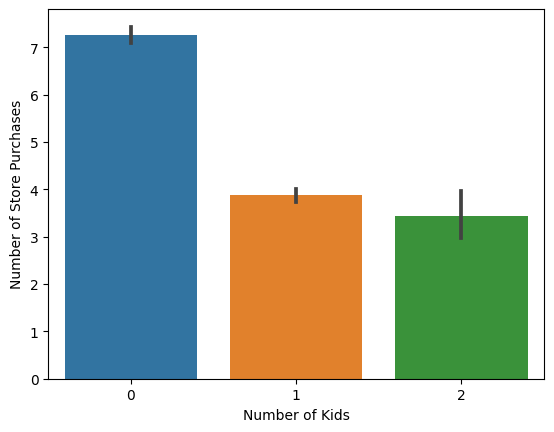

In [ ]:
sns.barplot(data=superstore_df,x='Kidhome',y='NumStorePurchases')
plt.xlabel("Number of Kids")
plt.ylabel("Number of Store Purchases")
plt.show()

This chart shows that, Customers with no kids do more number of store purchases compared to customers having children.

**Conclusion:**

*   Money spent on wine products are high in customers having high income.
*   Meat products are consumed by almost all type of customers in high amount.

*   Customers with high income tend to buy products directly from store.
*   Number of store purchases increases sales of superstore. So, customers with high income are important customers.

*   Customers having kids, perform more website visits, providing more offers like discounts and marketing campaigns to convert them to store or web purchases improves sales.


*   There are more number of Married and graduated customers, and most of the offers are accepted by these customers.


*    Most of the offers are accepted by customers having high income.


*   Promoting more offers on wine and meat products,and customer feedback on service may improve the number of acceptance of offer.






